# <center> Домашнее задание "визуализация на Python"




In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
players = pd.read_csv('Players.csv')
print(players.shape)

(3922, 8)


In [3]:
stats = pd.read_csv('Seasons_Stats.csv')
print(stats.shape)

(24691, 53)


In [4]:
taxi = pd.read_csv('train.csv')

In [5]:
players=players.dropna()


In [6]:
stats = stats.drop(['blanl','blank2'], axis=1)
print(stats.shape)

(24691, 51)


In [7]:
stats=stats.dropna()
print(stats.shape)

(14585, 51)


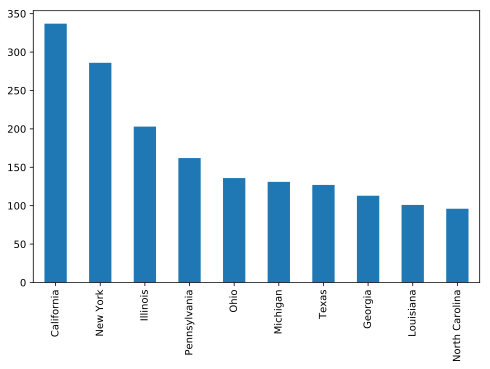

In [8]:
players['birth_state'].value_counts().head(10).plot(kind='bar') # Топ 10 штатов по количеству игроков родившихся в них

In [9]:
pl=players[['Player'] + ['born']].groupby('born').count()
pl.head()

,Player
born,
1915.0,1
1917.0,4
1918.0,4
1919.0,5
1920.0,14


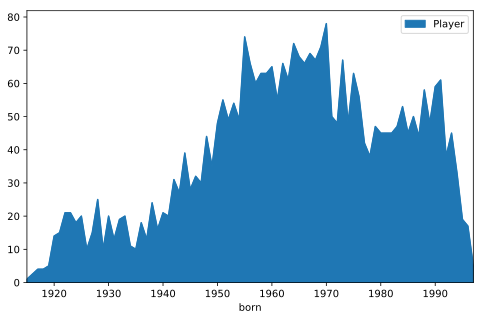

In [10]:
pl.plot(kind='area') # Количество игроков родившихся в данные годы


In [11]:
import seaborn as sns

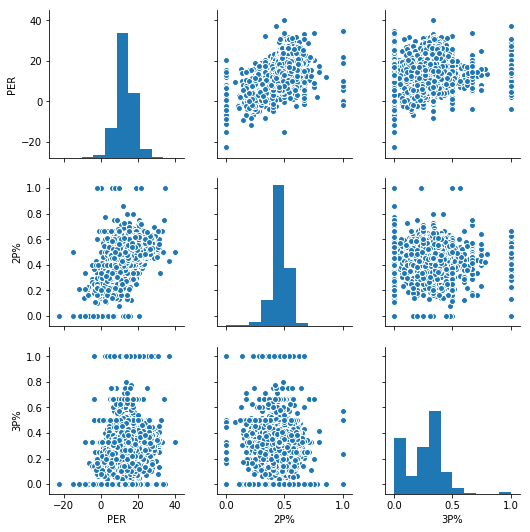

In [12]:
# Вывод зависимоси рейтинага игрока и процента реализованых 2-х очковых и 3-х очковых бросков
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    stats[['PER', '2P%', '3P%']]);


In [13]:
taxi_df=taxi.loc[lambda x: taxi.trip_duration<7200]

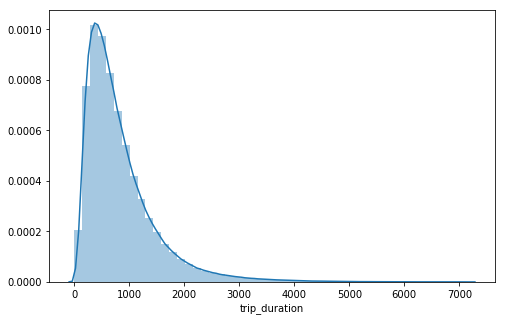

In [14]:
sns.distplot(taxi_df.trip_duration); # Распределение времени поезки на такси (ось x ограничена искуствено для наглядности распределения)

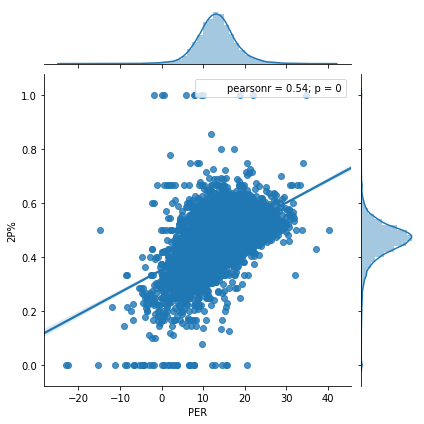

In [15]:
sns.jointplot(x='PER', y='2P%',  data=stats, kind='reg'); # Корреляция рейтинга игрока от реализованых 2-х очковых бросков

In [16]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [17]:
df1=stats.groupby(['Year'])['Age'].mean()

In [18]:
trace0 = go.Scatter(
    x=df1.index,
    y=df1,
  
)


data = [trace0]
layout = {'title': 'Средний возраст игроков на начало сезона'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)

In [19]:
plotly.offline.plot(fig, filename='mean_age.html', show_link=False);